This section was written by Jack Dennison. 


 ## Introduction  
 Hello! My name is Jack Dennison and I am a junior dual Applied Data Analysis and Geographic Information 
 systems major. I am interested in the intersection of geography and statistics, so this presentation 
 reflects that. Therefore, I'm going to talk about the various ways that Geographic Data Analysis can be 
 done using python. Some examples of things that will be disussed are `geopy`, `geopandas`, and `arcpy`.

 ## Downloading the Necessary Packages
 In order to download GeoPy, you can simply install it using either Conda or pip commands.
 Using Conda:
 ```bash
 conda install geopy
 ```
 Using pip:
 ```bash
 pip install geopy
 ```
 
 To install GeoPandas, it's recommended that you first download prerequisite packages, such as NumPy, 
 pandas, shapely, and Fiona. After that, you can use Conda or pip to install GeoPandas.

 Using Conda:
 ```bash
 conda install numpy pandas shapely Fiona
 conda install geopandas
 ```

 Using pip:
 ```bash
 pip install numpy pandas shapely Fiona
 pip install geopandas
 ```

 ## GeoPy Overview
 GeoPy is a powerful Python library that provides geocoding capabilities and various geospatial 
 utilities. It allows users to perform various tasks related to geographical information, including 
 geocoding, reverse geocoding, distance calculations, and more.

 ### Geocoding
 GeoPy can be used to geocode, which is to turn addresses into locations on the coordinate system plane. 
 For example, take an address from the Rodent Data Spreadsheet.

 * 265 Putnam Avenue, Brooklyn, New York

 Using the Nominatim encoder from OpenStreetMap, we can geocode to find the lattitude and longitude of 
 this address. Before going through with this, it should be noted that the rodent data file does give
 the latitude and longitude of every rodent incident, so this will be used to check work. The coordinates
 given by the data are as follows: (40.683855196486164, -73.95164557951071). Let's see if we can 
 replicate this with geopy.


In [5]:
from geopy.geocoders import Nominatim

# Initialize the Nominatim geocoder
geolocator = Nominatim(user_agent="GeoCoding")

# Address to be geocoded
address = "265 Putnam Avenue, Brooklyn, NY"

try:
    # Perform geocoding
    location = geolocator.geocode(address)

    if location:
        # Print the results
        print("Address:", address)
        print("Latitude:", location.latitude)
        print("Longitude:", location.longitude)
    else:
        print("Location not found.")
except Exception as e:
    print("Error:", e)

Address: 265 Putnam Avenue, Brooklyn, NY
Latitude: 40.68404835
Longitude: -73.95149699550375





 And the output is as follows:
Address: 265 Putnam Avenue, Brooklyn, NY
Latitude: 40.68404835
Longitude: -73.95149699550375

 This is remarkably similar to the coordinates given by the rodent data file, meaning that we can 
 confirm that that data is accurate.

 ### Reverse Geocoding
 Similarly to how we can use GeoPy to geocode a coordinate based off of an address, we can also do this
 in reverse: take an address from a lattitude and longitude. Let's again take two coordinates from the
 rodent data:

 * (40.77924175816874, -73.95368859796383)

With this code, the latitude is the first number and the longitude is the second number.  This latitude,
according to the spreadsheet, gives the address 1538 Third Avenue, Manhattan, New York. Let's 
reverse-geocode to find if the address of these coordinates is accurate.



In [6]:
from geopy.geocoders import Nominatim

# Initialize the Nominatim geocoder
geolocator = Nominatim(user_agent="ReverseGeoCoding")

# Coordinates to be reverse geocoded (latitude and longitude)
latitude = 40.77924175816874
longitude = -73.95368859796383

try:
    # Perform reverse geocoding
    location = geolocator.reverse((latitude, longitude), exactly_one=True)

    if location:
        # Print the results
        print("Latitude:", latitude)
        print("Longitude:", longitude)
        print("Address:", location.address)
    else:
        print("Location not found.")
except Exception as e:
    print("Error:", e)


Latitude: 40.77924175816874
Longitude: -73.95368859796383
Address: 1538, 3rd Avenue, Carnegie Hill, Manhattan, New York County, City of New York, New York, 10028, United States


And here is the output:
 Latitude: 40.77924175816874
 Longitude: -73.95368859796383
 Address: 1538, 3rd Avenue, Carnegie Hill, Manhattan, New York County, City of New York, New York, 
 10028, United States

 This matches up exactly with the address that is given in the spreadsheet. This demonstrates how useful
 reverse geo-coding can be with Python and GeoPy.

 ### Distance Mapping
 Geopy can also be used to map distances between locations. To exemplify this, let's use the two 
 coordinates from the previous two examples. We will be calculating the distance using the Haversine 
 formula, which is a method to compute distances between two points on a sphere.



 

In [7]:
from geopy.distance import distance

# Coordinates of two points (latitude and longitude)
point1 = (40.683855196486164, -73.95164557951071)  # Point from geocoding example
point2 = (40.77924175816874, -73.95368859796383)  # Point from reverse geocoding example

# Calculate the distance between the two points using the Haversine formula
distance_haversine = distance(point1, point2).miles  # You can also use kilometers by using .kilometers

# Print the result
print("Distance between the two listed points: {:.2f} miles".format(distance_haversine))


Distance between the two listed points: 6.58 miles




 Here is the output: 
 Distance between the two listed points: 6.58 miles

 This is an effective method to look at the distance between two points on earth. While the two locations
 in New York are rather close to each other, this method works regardless of the whereabouts of the points.

 ### Other Features
 In addition to these features, geopy can be used for a variety of other tasks. For instance, it can work
 with GeoPandas, Shapely, and Fiona to manipulate geospatial data. It allows users to easily switch 
 between different geocoding providers and customize their geocoding workflow based on their specific 
 needs. Because of the ease of use of the software and its open-source code, it's accessible to both 
 beginners and experienced developers and encourages collaboration and innovation, allowing users to 
 contribute enhancements, report issues, and share their experiences with the community.

 ## Geopandas
 Geopandas is another spatially related Python package, which allows a lot more operations to work with
 geospatial data. It extends the capabilities of the popular data manipulation library, pandas, by 
 adding support for geometric operations and spatial data types. GeoPandas combines the functionality of 
 pandas with the capabilities of other geospatial libraries such as Shapely, Fiona, and Matplotlib, 
 making it a powerful tool for geospatial analysis, manipulation, and visualization.

 ### Importing CSV Data
 To work with the rodent data with geopandas, the data first needs to imported into a GeoDataFrame. This 
 can be done easily, but it's important specify geometry column as the coordinate columns. Here is how
 it's done.


In [8]:
import geopandas as gpd
import pandas as pd

# Read CSV file into a GeoDataFrame
gdf = gpd.read_file('/Users/jackdennison/rodent-sighting-data-cleaning-RockinJack/HW4_rodents.csv', 
                    crs='EPSG:4326')  # Specify the coordinate reference system (CRS)

# Drop rows with missing or invalid coordinates
gdf = gdf.dropna(subset=['Longitude', 'Latitude'])

# Convert 'Longitude' and 'Latitude' columns to numeric type
gdf['Longitude'] = pd.to_numeric(gdf['Longitude'], errors='coerce')
gdf['Latitude'] = pd.to_numeric(gdf['Latitude'], errors='coerce')

# Create geometry column from Latitude and Longitude
gdf['geometry'] = gpd.points_from_xy(gdf['Longitude'], gdf['Latitude'])


### Visuallizing Geographic Data

Once you have imported the data into a GeoDataFrame, you can visualize it using GeoPandas plotting 
capabilities. There are a variety of plots to be used, but I'm going to use the simple matplotlib
scatterplot.

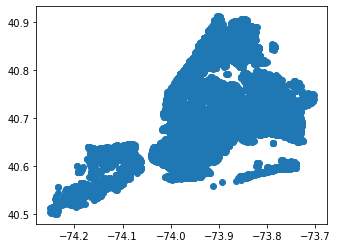

In [9]:
import matplotlib.pyplot as plt

# Plot the GeoDataFrame
gdf.plot()
plt.show()

This plot creates what almost looks like an outline of New York City, which is not only interesting in 
its own right, but also highlights the extent of the rodent problem in the city. Using geopandas can 
fully highlight the scope of the issue by showing the data on a visual scale.

### Geometric Operations

GeoPandas allows you to perform geometric operations on the GeoDataFrame. For example, you can buffer 
the points and calculate distances between points. Here's how these operations are done:

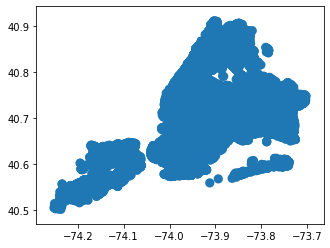

0             NaN
1        0.095408
2        0.101210
3        0.165848
4        0.017893
           ...   
82864    0.217853
82865    0.033870
82866    0.104741
82867    0.049369
82868    0.141928
Length: 82869, dtype: float64

In [10]:
import matplotlib.pyplot as plt
# Buffer the points by a certain distance
buffered = gdf.buffer(distance=0.01)

# Calculate distances between points
distances = gdf.distance(gdf.shift())

buffered.plot()
plt.show()
distances

The buffer creates a small circle around each point in the data. The plot reflects this, as the circles 
are slightly larger than the initial plot. Meanwhile, distances are listed as miles from one point to 
another. Both of these operations can be useful for various spatial data analytics topics.

### Exporting Data
Another feature of GeoPandas is that GeoDataFrames can be exported to various file types, such as 
shapefiles, GeoJSON, CSV, and other formats. This can be done using this code:


In [11]:
gdf.to_file('output.shp')

/var/folders/4s/r5kw56xn3tx7yt0kwh7btr4h0000gn/T/ipykernel_26013/3919060867.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file('output.shp')



This shapefile can be used with ArcGIS Pro and ArcPy to do further data analysis on it.

### Other Features
There are several other features that GeoPandas has. Its seamless integration with Pandas allows users 
to leverage the familiar DataFrame and Series data structures for geospatial data analysis. It can do 
operations such as joins and Geocoding which are improved versions of commands from Pandas and Geopy 
respectively. GeoPandas seamlessly integrates with other Python libraries commonly used in the 
geospatial ecosystem, such as Shapely, Fiona, Pyproj, Cartopy, and more. This interoperability allows 
users to leverage the functionalities of these libraries in conjunction with GeoPandas for advanced 
geospatial analysis and visualization tasks. These features make GeoPandas a valuable tool for 
geospatial data analysis, manipulation, and visualization in Python, suitable for a wide range of 
applications and domains.

## ArcPy
ArcPy is another very effective way to conduct geographic data analysis queries. This package is unique,
because it's unique to ESRI's ArcGIS software, which is geographic information system (GIS) software 
platform. This provides a comprehensive set of tools and functions for automating, customizing, and 
extending the capabilities of ArcGIS Desktop, including ArcMap, ArcCatalog, and ArcGIS Pro.

ArcPy allows users to manage and manipulate geospatial data within ArcGIS, provides access to a wide 
range of geoprocessing tools and spatial analysis functions available in ArcGIS, allows users to 
automate map creation and layout design, provides tools for converting between different geospatial data 
formats and data sources, and provides many more resources for optimizing the creation of maps. 
Unfortunately, due to the service requiring ArcGIS pro to function, the capabilities of ArcPy can not be 
demonstrated in class, but the usefulness of the program cannot be understated.

## Conclusion

In conclusion, Geographic Data Analysis offers a multitude of possibilities for exploring, visualizing, 
and understanding spatial relationships and patterns. Through the exploration of tools like GeoPy, 
GeoPandas, and ArcPy, we've uncovered a plethora of capabilities for geospatial data manipulation, 
analysis, and visualization using Python.

GeoPy, with its geocoding and reverse geocoding functionalities, provides valuable tools for translating 
addresses to coordinates and vice versa, enabling precise spatial analysis. Its distance calculation 
capabilities further enhance our ability to quantify spatial relationships and distances between 
locations.

GeoPandas extends the power of Pandas to spatial data analysis, allowing seamless integration of 
geometric operations and spatial data types into our workflows. From importing CSV data to performing 
geometric operations and visualizing geographic data, GeoPandas offers a comprehensive toolkit for 
geospatial analysis and visualization.

While ArcPy offers similar functionalities, it is uniquely tailored to the ArcGIS software platform, 
providing a robust set of tools for managing and analyzing geospatial data within ArcGIS Desktop 
environments. Although not directly demonstrated in this report, ArcPy serves as a powerful resource for 
GIS professionals, offering automation, customization, and extensibility capabilities.

Overall, the combination of GeoPy, GeoPandas, and ArcPy empowers users to explore, analyze, and 
visualize geospatial data with ease and precision. Whether it's exploring spatial relationships, 
conducting spatial analysis, or creating insightful visualizations, Geographic Data Analysis with Python 
opens up endless possibilities for understanding our world through spatial data.

## References

* GeoPy Documentation 
    + https://geopy.readthedocs.io/en/stable/
* GeoPandas Documentation: 
    + https://geopandas.org/en/stable/index.html
* ArcPy Info
    + https://pro.arcgis.com/en/pro-app/3.1/arcpy/get-started/what-is-arcpy-.htm
* NYC Rodent Data
    + https://data.cityofnewyork.us/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9/about_data